# Performance of machine learning models on predicting cancer using transcriptomic data.

In this notebook, we evaluate deep learning models trained on transcriptomic data (Tissue-specific expression of protein coding genes, lncRNAs and inclusion of splice sites) on the task of predicting normal versus tumor tissues. This notebook reproduces figure 1E, 1F, 1G, 1H and supplementary tables 8 and 9 of our pan-cancer manuscript.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

cmd_dir = "../results/paper_results/"
fig_dir = "../figures/"

binary_protein_coding = ["Iter0_pc_normal_vs_cancer.npz", 
                   "Iter1_pc_normal_vs_cancer.npz", 
                   "Iter2_pc_normal_vs_cancer.npz"]

binary_lncRNA = ["Iter0_lncrna_normal_vs_cancer.npz", 
                   "Iter1_lncrna_normal_vs_cancer.npz", 
                   "Iter2_lncrna_normal_vs_cancer.npz"]

binary_splicing = ["Iter0_splicing_normal_vs_cancer.npz", 
                   "Iter1_splicing_normal_vs_cancer.npz", 
                   "Iter2_splicing_normal_vs_cancer.npz"]

# DNN Performance on test set (Figure 1E).

In [2]:
print("\nDNN performance (Protein coding genes) on test set\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []
binary_pc_acc_data = []
binary_pc_dataset = []

for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["test_labels"], axis=1)
    y_scores = tmp_obj["test_pred"][:, 1] 
    y_scores_binary = np.argmax(tmp_obj["test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
    unique_datasets = np.unique(tmp_obj["test_datasets"])
    acc_dataset = []
    data_names = []
    for ii in unique_datasets:
        tt = np.where(tmp_obj["test_datasets"] == ii)[0]
        tmp_pred = y_true[tt]
        tmp_true = y_scores_binary[tt]
        label_names = np.unique(tmp_obj["test_label_names"][tt])
        acc = metrics.accuracy_score(tmp_true, tmp_pred)
        acc_dataset.append(acc)
        data_names.append(ii + " (n=" + str(len(tt)) + ")")
    binary_pc_acc_data.append(acc_dataset)
    binary_pc_dataset.append(data_names)
    
mean_vals_binary_pc = np.mean(binary_pc_acc_data, axis=0)
std_vals_binary_pc = np.std(binary_pc_acc_data, axis=0)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nDNN performance (lncRNA genes) on test set from same dataset as training\n")
binary_lncRNA_acc_data = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []
binary_lncRNA_acc = []
binary_lncRNA_dataset = []

    
for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["test_labels"], axis=1)
    y_scores_binary = np.argmax(tmp_obj["test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    unique_datasets = np.unique(tmp_obj["test_datasets"])
    acc_dataset = []
    data_names = []
    for ii in unique_datasets:
        tt = np.where(tmp_obj["test_datasets"] == ii)[0]
        tmp_pred = y_true[tt]
        tmp_true = y_scores_binary[tt]
        label_names = np.unique(tmp_obj["test_label_names"][tt])
        acc = metrics.accuracy_score(tmp_true, tmp_pred)
        acc_dataset.append(acc)
        data_names.append(ii + " (n=" + str(len(tt)) + ")")
    binary_lncRNA_acc_data.append(acc_dataset)
    binary_lncRNA_dataset.append(data_names)


    
mean_vals_binary_lncRNA = np.mean(binary_lncRNA_acc_data, axis=0)
std_vals_binary_lncRNA = np.std(binary_lncRNA_acc_data, axis=0)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))

print("\nDNN performance (Splicing junctions) on test set from same dataset as training\n")

binary_splicing_acc = []
binary_splicing_fscore = []
binary_splicing_aupr = []
binary_splicing_acc_data = []
binary_splicing_dataset = []

for ii in binary_splicing:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["test_labels"], axis=1)
    y_scores_binary = np.argmax(tmp_obj["test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_splicing_acc.append(acc)
    binary_splicing_fscore.append(fscoreOpt)
    binary_splicing_aupr.append(aupr)
    
    unique_datasets = np.unique(tmp_obj["test_datasets"])
    acc_dataset = []
    data_names = []
    for ii in unique_datasets:
        tt = np.where(tmp_obj["test_datasets"] == ii)[0]
        tmp_pred = y_true[tt]
        tmp_true = y_scores_binary[tt]
        label_names = np.unique(tmp_obj["test_label_names"][tt])
        acc = metrics.accuracy_score(tmp_true, tmp_pred)
        acc_dataset.append(acc)
        data_names.append(ii + " (n=" + str(len(tt)) + ")")
    binary_splicing_acc_data.append(acc_dataset)
    binary_splicing_dataset.append(data_names)

    
mean_vals_binary_splicing = np.mean(binary_splicing_acc_data, axis=0)
std_vals_binary_splicing = np.std(binary_splicing_acc_data, axis=0)
    
print("Fscore: {} +- {}".format(np.mean(binary_splicing_fscore)*100, 
                                         np.std(binary_splicing_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_splicing_aupr)*100, 
                                           np.std(binary_splicing_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_splicing_acc)*100, 
                                           np.std(binary_splicing_acc)*100))



DNN performance (Protein coding genes) on test set

Fscore: 98.81582155427328 +- 0.16646660880912018
Area under PR curve: 99.88097729222892 +- 0.00819078182527697
accuracy: 98.62051667920743 +- 0.19749204599979167

DNN performance (lncRNA genes) on test set from same dataset as training

Fscore: 98.77694475260836 +- 0.07696252061661021
Area under PR curve: 99.87178652412659 +- 0.0
accuracy: 98.57035364936041 +- 0.09215537030786838

DNN performance (Splicing junctions) on test set from same dataset as training

Fscore: 98.94594441647162 +- 0.08135642226461286
Area under PR curve: 93.3911238115973 +- 0.0
accuracy: 98.77100576874844 +- 0.0938464355849984


# Plot DNN performance of protein-coding, lncRNA and splicing models on test sets delineating individual datasets (Figure 1F).

Plot DNN performance of protein-coding, lncRNA and splicing models on test sets delineating datasets.


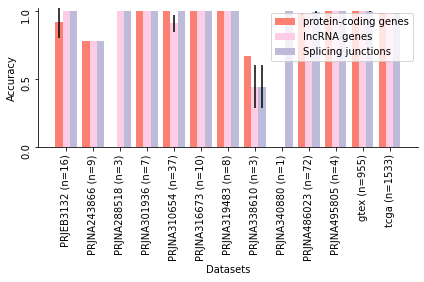

In [3]:
print("Plot DNN performance of protein-coding, lncRNA and splicing models on test sets delineating datasets.")

cmap_obj_tab20b = plt.cm.get_cmap('Set3')
fig, ax = plt.subplots()
ax.set_ylim([0.0, 1.02])
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_yticklabels([0.0, 0.5, 1.0], rotation=90)
x = np.arange(len(mean_vals_binary_pc))
width = 0.8
ax.bar(x - width/3, mean_vals_binary_pc, width/3, 
       yerr=std_vals_binary_pc, color=cmap_obj_tab20b(3), label = "protein-coding genes")
ax.bar(x, mean_vals_binary_lncRNA, width/3, 
       yerr=std_vals_binary_lncRNA, color=cmap_obj_tab20b(7), label = "lncRNA genes")
ax.bar(x + width/3, mean_vals_binary_splicing, width/3, 
       yerr=std_vals_binary_splicing, color=cmap_obj_tab20b(2), label = "Splicing junctions")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
lbls = binary_pc_dataset[0]
ax.set_xticklabels(lbls, rotation = 90)
plt.ylabel("Accuracy")
plt.xlabel("Datasets")
plt.legend()
plt.tight_layout()
plt.savefig(fig_dir + "dataset_all_models.pdf", transparent=True)
plt.show()

# DNN Performance on independent test set (Figure 1G).

In [4]:
print("\nDNN performance (Protein coding genes) on independent test set\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []

for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores = tmp_obj["unseen_test_pred"][:, 1] 
    y_scores_binary = np.argmax(tmp_obj["unseen_test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nDNN performance (lncRNA genes) on independent test set\n")
binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores = tmp_obj["unseen_test_pred"][:, 1]
    y_scores_binary = np.argmax(tmp_obj["unseen_test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))

print("\nDNN performance (Splicing junctions) on independent test set\n")

binary_splicing_acc = []
binary_splicing_fscore = []
binary_splicing_aupr = []
binary_splicing_acc = []
binary_splicing_dataset = []

for ii in binary_splicing:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores = tmp_obj["unseen_test_pred"][:, 1]
    y_scores_binary = np.argmax(tmp_obj["unseen_test_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_splicing_acc.append(acc)
    binary_splicing_fscore.append(fscoreOpt)
    binary_splicing_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_splicing_fscore)*100, 
                                         np.std(binary_splicing_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_splicing_aupr)*100, 
                                           np.std(binary_splicing_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_splicing_acc)*100, 
                                           np.std(binary_splicing_acc)*100))



DNN performance (Protein coding genes) on independent test set

Fscore: 95.0163056424916 +- 0.278422711619866
Area under PR curve: 99.28446931093582 +- 0.08745140598402144
accuracy: 94.57364341085271 +- 0.2740723958087399

DNN performance (lncRNA genes) on independent test set

Fscore: 92.55968652548009 +- 0.36934705140390134
Area under PR curve: 98.82487081854613 +- 0.2678710805198097
accuracy: 92.24806201550388 +- 0.2740723958087399

DNN performance (Splicing junctions) on independent test set

Fscore: 91.44109475517487 +- 0.7908535767574254
Area under PR curve: 98.53896043783644 +- 0.5591638007742027
accuracy: 91.08527131782945 +- 0.725127400537582


# SVM performance on protein-coding, lncRNA and splicing junction on independent test set (Supplementary table 8). 

In [5]:
print("\nSVM performance on protein coding genes on independent test set\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []
 
for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores_binary = tmp_obj["unseen_test_pred_svm"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nSVM performance on lncRNA genes on independent test set\n")

binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores = tmp_obj["unseen_test_pred_svm"]
    
    y_scores_binary = tmp_obj["unseen_test_pred_svm"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))

print("\nSVM performance on splicing events on independent test set\n")

binary_splicing_acc = []
binary_splicing_fscore = []
binary_splicing_aupr = []

for ii in binary_splicing:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores = tmp_obj["unseen_test_pred_svm"]
    
    y_scores_binary = tmp_obj["unseen_test_pred_svm"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_splicing_acc.append(acc)
    binary_splicing_fscore.append(fscoreOpt)
    binary_splicing_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_splicing_fscore)*100, 
                                         np.std(binary_splicing_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_splicing_aupr)*100, 
                                           np.std(binary_splicing_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_splicing_acc)*100, 
                                           np.std(binary_splicing_acc)*100))


SVM performance on protein coding genes on independent test set

Fscore: 95.83333333333334 +- 1.1102230246251565e-14
Area under PR curve: 93.59443021363046 +- 0.0
accuracy: 95.34883720930233 +- 0.0

SVM performance on lncRNA genes on independent test set

Fscore: 93.93939393939394 +- 0.0
Area under PR curve: 89.55318415705102 +- 0.0
accuracy: 93.02325581395348 +- 0.0

SVM performance on splicing events on independent test set

Fscore: 83.43558282208589 +- 0.0
Area under PR curve: 87.2766217870257 +- 1.1102230246251565e-14
accuracy: 84.30232558139535 +- 0.0


# Random Forest performance on protein-coding, lncRNA and splicing junction on independent test set (Supplementary table 8). 

In [6]:
print("\nRandom Forest performance on protein coding genes on independent test set\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []

for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores_binary = tmp_obj["unseen_test_pred_rf"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nRandom Forest performance on lncRNA genes on independent test set\n")

binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores_binary = tmp_obj["unseen_test_pred_rf"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)

    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))

print("\nRandom Forest performance on splicing events on independent test set\n")

binary_splicing_acc = []
binary_splicing_fscore = []
binary_splicing_aupr = []

for ii in binary_splicing:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    y_scores_binary = tmp_obj["unseen_test_pred_rf"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    prec, recall, thresholds = metrics.precision_recall_curve(y_true, y_scores_binary, pos_label=1)
    
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)

    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_splicing_acc.append(acc)
    binary_splicing_fscore.append(fscoreOpt)
    binary_splicing_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_splicing_fscore)*100, 
                                         np.std(binary_splicing_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_splicing_aupr)*100, 
                                           np.std(binary_splicing_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_splicing_acc)*100, 
                                           np.std(binary_splicing_acc)*100))


Random Forest performance on protein coding genes on independent test set

Fscore: 87.22295935918227 +- 1.0873929250253793
Area under PR curve: 89.41170812378273 +- 1.004873925449178
accuracy: 87.40310077519379 +- 0.9881820762776732

Random Forest performance on lncRNA genes on independent test set

Fscore: 90.9856956586853 +- 1.9315544222437944
Area under PR curve: 84.1225326540044 +- 3.3688635745084454
accuracy: 89.14728682170542 +- 2.614484023882178

Random Forest performance on splicing events on independent test set

Fscore: 68.95313681027969 +- 1.269371583762703
Area under PR curve: 78.79436964504286 +- 0.6664286677033536
accuracy: 73.83720930232558 +- 0.8222171874262194


# DNN Performance on Liquid tumors (blood tissues and tumors, Figure 1H and Supplementary table 9).

In [7]:
print("\nDNN performance on protein coding genes on liquid tumors\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []

for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)
    y_scores = tmp_obj["unseen_pred"][:, 1] 
    y_scores_binary = np.argmax(tmp_obj["unseen_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nDNN performance (lncRNA genes) on liquid tumors\n")
binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)
    y_scores = tmp_obj["unseen_pred"][:, 1] 
    y_scores_binary = np.argmax(tmp_obj["unseen_pred"], axis=1)
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))



DNN performance on protein coding genes on liquid tumors

Fscore: 66.64255796707788 +- 1.9698252369220979
Area under PR curve: 66.64255796707788 +- 1.9698252369220979
accuracy: 66.04938271604938 +- 0.8729713347982054

DNN performance (lncRNA genes) on liquid tumors

Fscore: 78.75108093479506 +- 7.250263761270172
Area under PR curve: 78.75108093479506 +- 7.250263761270172
accuracy: 72.63374485596708 +- 1.2683979429977283


# SVM Performance on Liquid tumors (blood tissues and tumors, Figure 1H and Supplementary table 9).

In [8]:
print("\nSVM performance on protein coding genes on liquid tumors\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []

for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)
    y_scores_binary = tmp_obj["unseen_pred_svm"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nSVM performance on lncRNA genes on liquid tumors\n")

binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)    
    y_scores_binary = tmp_obj["unseen_pred_svm"]
    
    aupr = metrics.average_precision_score(y_true, y_scores_binary, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))


SVM performance on protein coding genes on liquid tumors

Fscore: 39.71402832882909 +- 0.1002930669269662
Area under PR curve: 42.6367853776306 +- 0.07112422731472723
accuracy: 30.65843621399177 +- 0.2909904449327343

SVM performance on lncRNA genes on liquid tumors

Fscore: 58.87850467289719 +- 0.0
Area under PR curve: 47.51808089183711 +- 0.0
accuracy: 45.67901234567901 +- 0.0


# Random Forest Performance on Liquid tumors (blood tissues and tumors, Figure 1H and Supplementary table 9).

In [9]:
print("\nRandom forest performance on protein coding genes on liquid tumors\n")
binary_protein_coding_acc = []
binary_protein_coding_fscore = []
binary_protein_coding_aupr = []
 
for ii in binary_protein_coding:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)
    y_scores = tmp_obj["unseen_pred_rf"]
    y_scores_binary = tmp_obj["unseen_pred_rf"]
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_protein_coding_acc.append(acc)
    binary_protein_coding_fscore.append(fscoreOpt)
    binary_protein_coding_aupr.append(aupr)
    
print("Fscore: {} +- {}".format(np.mean(binary_protein_coding_fscore)*100, 
                                            np.std(binary_protein_coding_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_protein_coding_aupr)*100, 
                                           np.std(binary_protein_coding_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_protein_coding_acc)*100, 
                                           np.std(binary_protein_coding_acc)*100))

print("\nRandom Forest performance on lncRNA genes on liquid tumors\n")

binary_lncRNA_acc = []
binary_lncRNA_fscore = []
binary_lncRNA_aupr = []

for ii in binary_lncRNA:
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    y_true = np.argmax(tmp_obj["unseen_labels"], axis=1)
    y_scores = tmp_obj["unseen_pred_rf"]
    y_scores_binary = tmp_obj["unseen_pred_rf"]
    
    aupr = metrics.average_precision_score(y_true, y_scores, pos_label=1)
    fscoreOpt = metrics.f1_score(y_true, y_scores_binary, pos_label=1)
    acc = metrics.accuracy_score(y_true, y_scores_binary)
    
    binary_lncRNA_acc.append(acc)
    binary_lncRNA_fscore.append(fscoreOpt)
    binary_lncRNA_aupr.append(aupr)
    
    
print("Fscore: {} +- {}".format(np.mean(binary_lncRNA_fscore)*100, 
                                         np.std(binary_lncRNA_fscore)*100))

print("Area under PR curve: {} +- {}".format(np.mean(binary_lncRNA_aupr)*100, 
                                           np.std(binary_lncRNA_aupr)*100))

print("accuracy: {} +- {}".format(np.mean(binary_lncRNA_acc)*100, 
                                           np.std(binary_lncRNA_acc)*100))


Random forest performance on protein coding genes on liquid tumors

Fscore: 66.39233721774612 +- 0.39122059887910526
Area under PR curve: 49.69329916919015 +- 0.4392308602758285
accuracy: 50.0 +- 0.8729713347982107

Random Forest performance on lncRNA genes on liquid tumors

Fscore: 66.11570247933885 +- 0.0
Area under PR curve: 49.382716049382715 +- 0.0
accuracy: 49.382716049382715 +- 0.0
